In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cadaster = pd.read_csv("data/cadaster_1808.csv")

In [3]:
list_family_names = pd.read_csv("data/Venice_list_of_names.csv", sep='\t"')

list_family_names = list_family_names.apply(lambda x: x.str.replace("\"", ""))

list_family_names.columns = [ 'family', '1808', 'Noble', 'Citoyen', 'famille.12e.siecle']

list_family_names.index = list_family_names.index.map(lambda x: x.replace("\"", ""))

list_family_names.to_csv("data/venice_families_cleaned.csv")

<ipython-input-3-646beb43eb24>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  list_family_names = pd.read_csv("data/Venice_list_of_names.csv", sep='\t"')


In [4]:
list_family_names

,family,1808,Noble,Citoyen,famille.12e.siecle
1,abramo,0,NA,0,0
2,acotanto,0,1,0,0
3,acquisti,1,1,0,0
4,adami,1,1,1,0
5,adoaldi,0,1,0,0
...,...,...,...,...,...
4459,cortonovich,1,0,0,0
4460,zanutta,1,0,0,0
4461,manfrini,1,0,0,0
4462,bardini,1,0,0,0


### Extracting the family names in capital letters


In [5]:
capitals = cadaster.parcelOwnerText.str.extract(r'(?P<Names>[A-Z]{2,})')
capitals['Names'].apply(lambda x : len(str(x).split(" ")))
capitals

,Names
0,PAGANI
1,TIEPOLO
2,PAGANI
3,BELLI
4,TIEPOLO
...,...
23423,PIAZZA
23424,DEMANIO
23425,REGIO
23426,DEMANIO


In [6]:
capitals.groupby('Names')['Names'].count().sort_values(ascending=False)

Names
CITTA        652
COMUNE       413
MOROSINI     280
CONTARINI    245
CORNER       218
            ... 
FOSCARIN       1
SALA           1
FORTUNIO       1
FORNONI        1
SEGREGO        1
Name: Names, Length: 2196, dtype: int64

In [7]:
df = capitals[capitals['Names'].str.lower().isin(list_family_names.family)]

In [8]:
df.groupby('Names')['Names'].count().sort_values(ascending=False)

Names
CITTA        652
COMUNE       413
MOROSINI     280
CONTARINI    245
CORNER       218
            ... 
FORTUNIO       1
FORNONI        1
SALA           1
SALAROL        1
LIVIO          1
Name: Names, Length: 2185, dtype: int64

In [122]:
cadaster

,id,sestiere,parcelNumber,subParcelNumber,correspondanceAustrian,correspondanceItalian,toponym,houseNumber,parcelOwnerText,parcelCategoryText,parcelCategories,parcelOwnershipType,area,bounds
0,0,NSM,1,NaN,ASM 2121 ASM 2122,AISM 2121 AISM 2122,SM - Parrocchia di S. Fantino,3205;3206,PAGANI - Concorso de' creditori,Casa d'affitto,['CASA'],['AFFITTO'],608.117,"[[12.334122, 45.433708], [12.3348277, 45.43387..."
1,1,NSM,2,1,ASM 2124,AISM 2124,SM - Parrocchia di S. Fantino,3207,TIEPOLO Gerolamo q. Almorò,Casa d'affitto,['CASA'],['AFFITTO'],540.546,"[[12.334480899999999, 45.4337119], [12.3348348..."
2,2,NSM,2,2,ASM 2124,AISM 2124,SM - Parrocchia di S. Fantino,NaN,PAGANI - Concorso come sopra al N° 1 [de' cred...,Casa d'affitto,['CASA'],['AFFITTO'],540.546,"[[12.334480899999999, 45.4337119], [12.3348348..."
3,3,NSM,3,1,ASM 2123,AISM 2123,SM - Parrocchia di S. Fantino,3208,BELLI Angelo Livellario di Lorenzo Tiepolo,Bottega unica a proprio uso,['BOTTEGA'],['PROPRIO'],80.042,"[[12.3341454, 45.4336382], [12.334232, 45.43372]]"
4,4,NSM,3,2,ASM 2123,AISM 2123,SM - Parrocchia di S. Fantino,3209,TIEPOLO Lorenzo q. Almorò,Superiori d'affitto,[],['AFFITTO'],80.042,"[[12.3341454, 45.4336382], [12.334232, 45.43372]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23423,23423,NSM,V,NaN,non esiste corrispondente,non esiste corrispondente,SM - Parrocchia di S. Samuele,NaN,PIAZZA detta di S. Samuele,-,[],[],NaN,NaN
23424,23424,NSM,X,NaN,ASM 2411,AISM 2411,SM - Parrocchia di S. Samuele,2501,"DEMANIO, e per esso il Ministero dell'Interno",Casa ad uso del Regio Conservatorio di S. Rocc...,['CASA'],[],767.036,"[[12.3294436, 45.4334037], [12.3297769, 45.433..."
23425,23425,NSM,XY,NaN,ASM 2411 ASM 2412,AISM 2411 AISM 2412,SM - Parrocchia di S. Samuele,2501,REGIO Conservatorio suddetto [S. Rocco e S. Ma...,Monastero,['MONASTERO'],[],NaN,NaN
23426,23426,NSM,Y,NaN,ASM 2411 ASM 2412,AISM 2411 AISM 2412,SM - Parrocchia di S. Samuele,2501,"Suddetto o[DEMANIO, e per esso il Ministero de...",Locale suddetto,['LOCALE'],[],2552.856,"[[12.3295519, 45.4333128], [12.3302745, 45.433..."


In [9]:
public_names = 'citta|demanio|chiesa|piazza|ministero|comune|societa|congregazione|di'
non_public = df[~df.Names.str.contains(public_names, na=False, case=False)]
name_count_cadaster = non_public.groupby('Names')['Names'].count().sort_values(ascending=False)

In [10]:
name_count_cadaster.to_csv('data/names_cadaster.csv')

## Catastici

In [11]:
catastici = pd.read_csv('data/catastici_1741_cleaned.csv')

In [12]:
family_name_options = list_family_names['family'].values

catastici['entryOwnerText_l'] = catastici['entryOwnerText'].apply(lambda x: str(x).lower())
catastici['entryTenantText_l'] = catastici['entryTenantText'].apply(lambda x: str(x).lower())



In [35]:
# we will use a fuzzy ratio to extract the name
from fuzzywuzzy import fuzz, process

top_3_names = catastici['entryOwnerText_l'].apply(lambda x: process.extract(x,family_name_options, scorer=fuzz.token_set_ratio, limit = 3))


In [60]:
tenant_name = catastici['entryTenantText_l'].apply(lambda x: process.extractOne(x,family_name_options, scorer=fuzz.token_set_ratio))


In [27]:
tenant_name = pd.read_csv("tenant_names.csv")
top_3_names = pd.read_csv("top_3_names.csv")

In [28]:
# tenant_name.to_csv("tenant_names.csv")

In [29]:
tenant_name = tenant_name.drop("Unnamed: 0", axis = 1)
top_3_names = top_3_names.drop("Unnamed: 0", axis = 1)

In [42]:
tenant_name['entryTenantText_l']= tenant_name['entryTenantText_l'].apply(lambda x: eval(x))
catastici['tenant'] = pd.DataFrame(tenant_name)

In [37]:
top_3_names['entryOwnerText_l']= top_3_names['entryOwnerText_l'].apply(lambda x: eval(x))


In [32]:
owner_3 = ['owner_name1','owner_name2','owner_name3']
catastici[owner_3] = pd.DataFrame(top_3_names)['entryOwnerText_l'].apply(lambda x: pd.Series(x))

In [33]:
for col in owner_3:
    catastici[col] = catastici[col].apply(lambda x: x[0] if x[1] > 95 else None)
    catastici[col] = catastici[col].apply(lambda x: x if x != 'di' and x != 'de' else None)

In [20]:
catastici['tenant'] = catastici['tenant'].apply(lambda x: x[0])

In [43]:
melted = catastici.melt(id_vars = ['id', 'entryId', 'entryOwnerText', 'entryTenantText',
       'entryCategoryText', 'rent', 'cadaster1808Correspondance', 'toponym',
       'entryCategories', 'cadaster1808ClosestParcel', 'position',
       'entryOwnerText_l','tenant','entryTenantText_l']).dropna(subset=['value'])

In [44]:
melted['family_owner_count'] = melted.groupby('value')['id'].transform('count')

In [45]:
melted['family_tenant_count'] = melted.groupby('tenant')['id'].transform('count')

In [46]:
melted['family_tenant_count']

2          2
3         42
4         10
5        155
6         17
        ... 
29136     17
29137      3
29138     66
29139     45
29164    839
Name: family_tenant_count, Length: 12689, dtype: int64

In [47]:
cata2 = pd.read_csv('cata2.csv')

In [48]:
cata3 = cata2[['cadaster1808Correspondance','area','parcelNumber']].drop_duplicates().merge(melted, on = 'cadaster1808Correspondance')

In [49]:
cata3['ownerAreaSum'] = cata3.groupby('value')['area'].transform('sum')
cata3['family_area_mean'] = cata3['ownerAreaSum'] / cata3['family_owner_count']


In [61]:
melted[['category1','category2','category3']] = melted['entryCategories'].apply(lambda x: eval(x)).apply(pd.Series)

In [65]:
melted2 = melted.melt(id_vars=  ['id', 'entryId', 'entryOwnerText', 'entryTenantText',
       'entryCategoryText', 'rent', 'cadaster1808Correspondance', 'toponym',
       'entryCategories', 'cadaster1808ClosestParcel', 'position',
       'entryOwnerText_l','tenant','entryTenantText_l','variable','value',
                                'family_owner_count','family_tenant_count'], value_name = 'category').dropna(subset=['category'])

In [74]:
type_of_ownership = melted2.groupby(['value','category','entryId'])['id'].count().reset_index()

In [78]:
vals = type_of_ownership[type_of_ownership['value'] == 'morosini'].groupby("category")['entryId'].nunique()

In [87]:
cool = type_of_ownership.groupby(['value','category'])['entryId'].nunique().reset_index()
family_ownership = type_of_ownership.groupby('value')['entryId'].nunique().reset_index()
cool = cool.merge(family_ownership, on = 'value')

In [95]:
cool = cool[(cool['entryId_y'] > 10) & (cool['entryId_y'] < 200)] 
cool['proportion'] = cool['entryId_x'] / cool['entryId_y']


<ipython-input-95-8021b8d49f74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cool['proportion'] = cool['entryId_x'] / cool['entryId_y']


In [99]:
cool

,value,category,entryId_x,entryId_y,proportion
51,anna,housing,11,15,0.733333
52,anna,shop,6,15,0.400000
53,anna,storage,4,15,0.266667
59,arigoni,housing,10,13,0.769231
60,arigoni,shop,5,13,0.384615
...,...,...,...,...,...
1980,zotti,guild,1,15,0.066667
1981,zotti,housing,14,15,0.933333
2005,zulian,housing,32,43,0.744186
2006,zulian,shop,21,43,0.488372


In [108]:
from scipy.stats import entropy
entropy =cool.groupby("value")['proportion'].agg(entropy).sort_values()

In [121]:
cool[cool['category'] =='housing'].sort_values(by= 'proportion',ascending=False).head(10)

,value,category,entryId_x,entryId_y,proportion
524,croce,housing,14,14,1.000000
120,barbon,housing,14,14,1.000000
72,arrigoni,housing,14,14,1.000000
1202,michielli,housing,15,15,1.000000
1374,patriarcato,housing,13,13,1.000000
1688,scotti,housing,12,12,1.000000
334,calbo,housing,25,26,0.961538
1190,miani,housing,21,22,0.954545
989,levi,housing,20,21,0.952381
675,emo,housing,19,20,0.950000


In [104]:
cool.sort_values(by=['proportion']).groupby('value')['proportion'].mean().sort_values()

value
giustinian    0.179167
venier        0.187500
zaccaria      0.188645
corner        0.192494
girolamo      0.193878
                ...   
sandi         0.615385
michielli     0.644444
barbon        0.750000
croce         1.000000
arrigoni      1.000000
Name: proportion, Length: 175, dtype: float64

<ipython-input-85-d2e9234959c8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vals.index,rotation = 90)


[Text(0, 0, 'housing'),
 Text(1, 0, 'storage'),
 Text(2, 0, 'shop'),
 Text(3, 0, 'hospitality'),
 Text(4, 0, 'entertainment'),
 Text(5, 0, 'palace')]

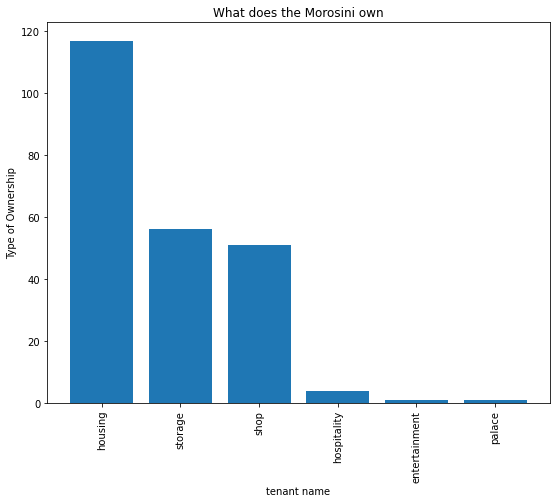

In [85]:
# for_plot = morosini.sort_values(by = 'proportion_of_rentals',ascending=False).head(20)
vals = vals.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(9,7))
ax.bar(vals.index,vals.values)
ax.set_xlabel("tenant name")
ax.set_ylabel("Type of Ownership")
ax.set_title("What does the Morosini own")
ax.set_xticklabels(vals.index,rotation = 90)

In [89]:
morosini = melted[melted['value'] == 'morosini'].groupby('tenant').agg({'id':'count','family_tenant_count':'mean'})

In [91]:
morosini['proportion_of_rentals'] = morosini['id'] / morosini['family_tenant_count']

<ipython-input-99-d1051a1a3bbb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(for_plot.index,rotation = 90)


[Text(0, 0, 'gidoni'),
 Text(1, 0, 'brini'),
 Text(2, 0, 'ronzoni'),
 Text(3, 0, 'greco'),
 Text(4, 0, 'agrinali'),
 Text(5, 0, 'grassianceli'),
 Text(6, 0, 'coreggio'),
 Text(7, 0, 'epis'),
 Text(8, 0, 'mazzamano'),
 Text(9, 0, 'maistrorso'),
 Text(10, 0, 'stae'),
 Text(11, 0, 'pagan'),
 Text(12, 0, 'gerlin'),
 Text(13, 0, 'gagio'),
 Text(14, 0, 'morari'),
 Text(15, 0, 'persego'),
 Text(16, 0, 'satelico'),
 Text(17, 0, 'boniol'),
 Text(18, 0, 'megliorini'),
 Text(19, 0, 'bocchini')]

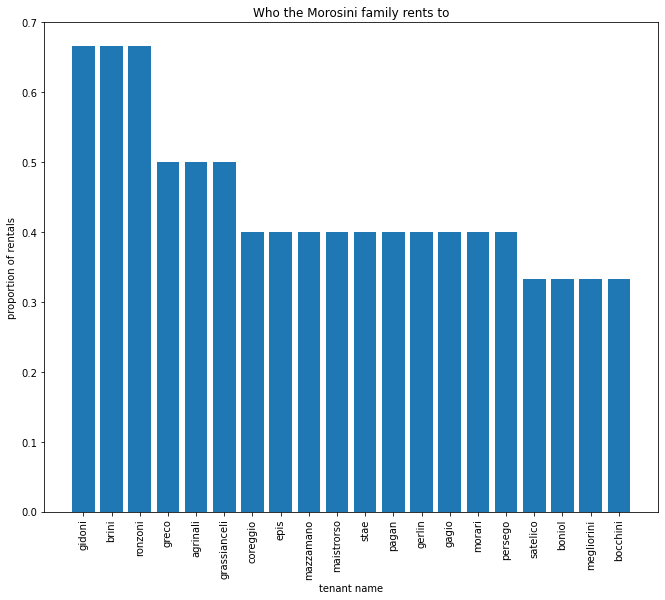

In [99]:
for_plot = morosini.sort_values(by = 'proportion_of_rentals',ascending=False).head(20)
fig, ax = plt.subplots(figsize=(11,9))
ax.bar(for_plot.index,for_plot['proportion_of_rentals'])
ax.set_xlabel("tenant name")
ax.set_ylabel("proportion of rentals")
ax.set_title("Who the Morosini family rents to")
ax.set_xticklabels(for_plot.index,rotation = 90)

In [101]:
melted.groupby('value').agg({''})

,id,entryId,entryOwnerText,entryTenantText,entryCategoryText,rent,cadaster1808Correspondance,toponym,entryCategories,cadaster1808ClosestParcel,position,entryOwnerText_l,tenant,variable,value,family_count,family_tenant_count
2,2,207.0,Alessandro Buffetti,Cristofolo Fianello,"Casa, primo appartamento",20.0,NaN,Calle Galliazza,['housing'],13268,"[12.33680766, 45.43745093]",alessandro buffetti,cristofoli,name1,buffetti,30,126
3,3,207.0,Alessandro Buffetti,Per uso del padrone,"Casa, secondo appartamento",NaN,NaN,Calle Galliazza,['housing'],13268,"[12.3368313, 45.43744348]",alessandro buffetti,del,name1,buffetti,30,121
4,4,207.0,Alessandro Buffetti,Inaffittato,"Casa, terzo appartamento",30.0,NaN,Calle Galliazza,['housing'],13268,"[12.33685662, 45.43743407]",alessandro buffetti,pinaffo,name1,buffetti,30,53
5,5,208.0,Alessandro Buffetti,Carlo Pezzi,Magazen,12.0,NaN,Calle Galliazza,['storage'],13268,"[12.336876759999999, 45.43742819]",alessandro buffetti,carlo,name1,buffetti,30,431
6,6,210.0,Alessandro Buffetti,Piero Baroni,Magazen,NaN,NaN,Calle Galliazza,['storage'],13268,"[12.3369179, 45.43741493]",alessandro buffetti,baroni,name1,buffetti,30,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68049,9717,105.0,Francesco e Zuanne fratelli Moro,Domenico Fabris,Casa in cinque fitanze,14.0,10105.0,Calletta della Torre,['housing'],10105,"[12.33397622, 45.4393669]",francesco e zuanne fratelli moro,fabris,entryTenantText_l,domenico fabris,6,79
68050,9718,105.0,Francesco e Zuanne fratelli Moro,Domenica Capellari,Casa in cinque fitanze,6.0,10105.0,Calletta della Torre,['housing'],10105,"[12.3339705, 45.43936174]",francesco e zuanne fratelli moro,capellari,entryTenantText_l,domenica capellari,1,16
68051,9719,105.0,Francesco e Zuanne fratelli Moro,Adamo Fachin,Casa in cinque fitanze,10.0,10105.0,Calletta della Torre,['housing'],10105,"[12.33396503, 45.4393554]",francesco e zuanne fratelli moro,da fin,entryTenantText_l,adamo fachin,1,5
68052,9720,166.0,Lugrezia Porta Guazzo Zia de Marchio e Fratell...,NaN,Per altra porzione di Casa,21.0,512.0,Calle di Ca' Corner,['housing'],512,"[12.32959686, 45.43466271]",lugrezia porta guazzo zia de marchio e fratell...,nani,entryTenantText_l,nan,803,2495


In [39]:
#Getting all owner rows with only two words (hoping that it's name and surname)
name_surname = catastici.entryOwnerText.apply(lambda x: len(str(x).split(' ')) == 2)

In [40]:
catastici[name_surname].groupby('entryOwnerText')['id'].count().sort_values(ascending=False)

entryOwnerText
Francesco Foscari       46
Michiel Morosini        46
Zuanne Pasqualigo       36
Marc'Antonio Grimani    32
Marin Bernardo          31
                        ..
Francesco Rubbi          1
Francesco Rota           1
Francesco Polverini      1
Francesco Pasta          1
diversi consorti         1
Name: id, Length: 1601, dtype: int64

In [41]:
catastici_names = catastici[name_surname]

In [42]:
catastici_names['owner_surname'] = catastici_names.entryOwnerText.apply(lambda x: str(x).split()[1])
catastici_names['owner_name'] = catastici_names.entryOwnerText.apply(lambda x: str(x).split()[0])

<ipython-input-42-3e1b65f7341e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catastici_names['owner_surname'] = catastici_names.entryOwnerText.apply(lambda x: str(x).split()[1])
<ipython-input-42-3e1b65f7341e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catastici_names['owner_name'] = catastici_names.entryOwnerText.apply(lambda x: str(x).split()[0])


In [43]:
catastici_names

,id,entryId,entryOwnerText,entryTenantText,entryCategoryText,rent,cadaster1808Correspondance,toponym,entryCategories,cadaster1808ClosestParcel,position,owner_surname,owner_name
2,2,207.0,Alessandro Buffetti,Cristofolo Fianello,"Casa, primo appartamento",20.0,NaN,Calle Galliazza,['housing'],13268,"[12.33680766, 45.43745093]",Buffetti,Alessandro
3,3,207.0,Alessandro Buffetti,Per uso del padrone,"Casa, secondo appartamento",NaN,NaN,Calle Galliazza,['housing'],13268,"[12.3368313, 45.43744348]",Buffetti,Alessandro
4,4,207.0,Alessandro Buffetti,Inaffittato,"Casa, terzo appartamento",30.0,NaN,Calle Galliazza,['housing'],13268,"[12.33685662, 45.43743407]",Buffetti,Alessandro
5,5,208.0,Alessandro Buffetti,Carlo Pezzi,Magazen,12.0,NaN,Calle Galliazza,['storage'],13268,"[12.336876759999999, 45.43742819]",Buffetti,Alessandro
6,6,210.0,Alessandro Buffetti,Piero Baroni,Magazen,NaN,NaN,Calle Galliazza,['storage'],13268,"[12.3369179, 45.43741493]",Buffetti,Alessandro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,9697,292.0,Daniel Giustinian,Antonio Strina,Casa,11.0,NaN,Campiel de Tedeschi,['housing'],13268,"[12.3291891, 45.43379258]",Giustinian,Daniel
9701,9701,297.0,Nicolò Corner,Gerolemo Todeschini,Casa,30.0,NaN,Campiel de Tedeschi,['housing'],13268,"[12.32911497, 45.43381953]",Corner,Nicolò
9702,9702,298.0,Nicolò Corner,Antonia Gerardi,Casa,8.0,NaN,Campiel de Tedeschi,['housing'],13268,"[12.32909029, 45.43381123]",Corner,Nicolò
9703,9703,299.0,Nicolò Corner,Giacomo Menegetti,Casa,12.0,NaN,Campiel de Tedeschi,['housing'],13268,"[12.32907088, 45.43379092]",Corner,Nicolò


In [53]:
catastici_names.to_csv('data/names_catastici.csv')

In [44]:
name_count_catastici = catastici_names.groupby('owner_surname')['id'].count().sort_values(ascending=False)

In [45]:
name_count_catastici

owner_surname
Contarini     95
Morosini      91
Grimani       77
Donà          75
Corner        71
              ..
Gregoletti     1
Gregorin       1
Grotta         1
Grotto         1
verde          1
Name: id, Length: 906, dtype: int64

## Which families own the most properties?

In [46]:
top_fams_catastici = name_count_catastici.head(25)
top_fams_catastici

owner_surname
Contarini     95
Morosini      91
Grimani       77
Donà          75
Corner        71
Venier        70
Pisani        66
Querini       64
Cassetti      57
Giustinian    54
Mocenigo      51
Foscari       49
Gritti        47
Barbarigo     47
Zen           47
Pasqualigo    45
Priuli        45
Molin         44
Capello       42
Bernardo      39
Soranzo       39
Dandolo       36
Trevisan      35
Foscarini     34
Tron          33
Name: id, dtype: int64

In [47]:
top_fams_cadaster = name_count_cadaster.head(25)
top_fams_cadaster

Names
MOROSINI      280
CONTARINI     245
CORNER        218
CAPITOLO      195
DONA          195
GRIMANI       181
FOSCARINI     176
DOLFIN        167
PISANI        166
ZEN           155
VENIER        150
MOCENIGO      141
PRIULI        140
GRADENIGO     138
GIUSTINIAN    132
MORO          113
MOLIN         110
QUERINI       109
BALBI         108
RENIER         99
ALBRIZZI       91
BARBARO        89
BRAGADIN       85
SAGREDO        84
TIEPOLO        84
Name: Names, dtype: int64

In [48]:
contarini = catastici_names[catastici_names.owner_surname.apply(lambda x : 'Contarini' in x)]

In [49]:
contarini

,id,entryId,entryOwnerText,entryTenantText,entryCategoryText,rent,cadaster1808Correspondance,toponym,entryCategories,cadaster1808ClosestParcel,position,owner_surname,owner_name
53,53,230.0,Angelo Contarini,Giovanni Battista Galvan,Bottega,32.0,2027.0,Calle de Stagneri,['shop'],2027,"[12.33706352, 45.43726575]",Contarini,Angelo
54,54,231.0,Angelo Contarini,Zuanne Boldon,Bottega,36.0,2027.0,Calle de Stagneri,['shop'],2027,"[12.33709071, 45.43725817]",Contarini,Angelo
55,55,232.0,Angelo Contarini,Zuanne Redolfi,Bottega,50.0,2027.0,Calle de Stagneri,['shop'],2027,"[12.33711791, 45.43725059]",Contarini,Angelo
210,210,52.0,Marco Contarini,Gaetano Bertoli,bottega da muschier e soler e casa in soler,94.0,NaN,Frezzaria,"['housing', 'shop', 'storage']",13268,"[12.3364587, 45.43362602]",Contarini,Marco
211,211,53.0,Marco Contarini,Antonio Dadie,Bottega di remessi e casa in tre soleri,92.0,1076.0,Frezzaria,"['housing', 'shop']",1076,"[12.33645101, 45.43365105]",Contarini,Marco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7911,7911,272.0,Simon Contarini,Marina CImentona,"Casa in tre soleri, secondo soler",12.0,NaN,Corte delle Scalle,"['housing', 'storage']",13268,"[12.32683132, 45.43634474]",Contarini,Simon
7912,7912,273.0,Simon Contarini,Marina Schiauta,"Casa in tre soleri, terzo soler",3.0,NaN,Corte delle Scalle,"['housing', 'storage']",13268,"[12.32683286, 45.43633452]",Contarini,Simon
7913,7913,274.0,Simon Contarini,Mustachio Pilon,"Casa in tre soleri, terzo soler",5.0,NaN,Corte delle Scalle,"['housing', 'storage']",13268,"[12.3268253, 45.43633659]",Contarini,Simon
8565,8565,254.0,Alessandro Contarini,Iseppo Sabbini,Casa,140.0,NaN,Giù del Ponte della Mandollina,['housing'],13268,"[12.33319466, 45.43489198]",Contarini,Alessandro


In [51]:
contarini.to_json("data/contarini.json")

In [50]:
contarini_boys = contarini.groupby('owner_name')['id'].count().sort_values(ascending=False)
contarini_boys

owner_name
Simon          17
Marco          14
Alvise         14
Alessandro     13
Francesco       4
Zuanne          4
Angelo          3
Maria           3
Marin           2
Paolo           2
Cremesina       2
Battista        1
Vincenzo        1
Procuratore     1
Pietro          1
Piero           1
Otavian         1
Michiel         1
Marietta        1
Antonio         1
Anzolo          1
Grassia         1
Giulio          1
Giorgio         1
Giacomo         1
Aurelio         1
Fantini         1
Huomini         1
Name: id, dtype: int64

list